# Combining Data from Multiple Tables

In [1]:
import pandas as pd


In [4]:
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv",
                              parse_dates=True)

In [5]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [7]:
air_quality_pm25 = pd.read_csv("air_quality_pm25_long.csv",
                               parse_dates=True)


In [9]:
air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                     "parameter", "value"]]
                                 

In [10]:
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


## How to combine data from multiple tables

### Concatenating objects
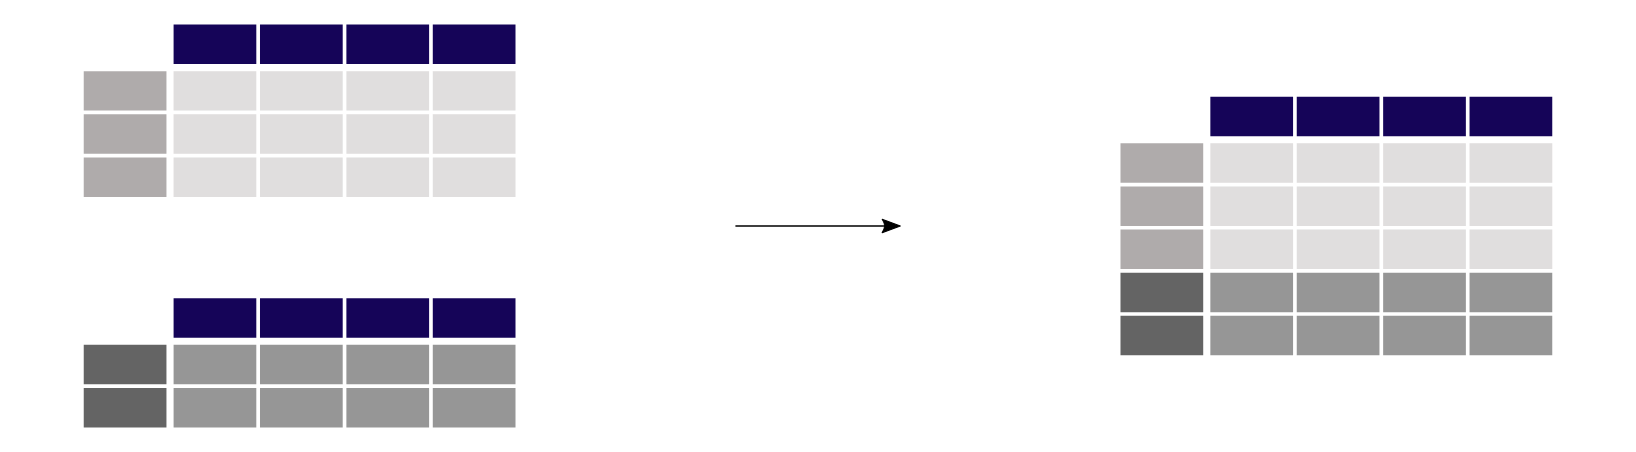

#### I want to combine the measurements of `NO2` and `PM25`, two tables with a similar structure, in a single table.

In [11]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [12]:
air_quality.head()

,date.utc,location,parameter,value,city,country,unit
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,NaN,NaN,NaN
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,NaN,NaN,NaN
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,NaN,NaN,NaN
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,NaN,NaN,NaN
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,NaN,NaN,NaN


#### The `concat()` function performs concatenation operations of multiple tables along one of the axes (row-wise or column-wise).

#### By default concatenation is along axis 0, so the resulting table combines the rows of the input tables. Let’s check the shape of the original and the concatenated tables to verify the operation:

In [16]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)
print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)
print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 7)
Shape of the resulting ``air_quality`` table:  (3178, 7)


#### Hence, the resulting table has 3178 = 1110 + 2068 rows.

### Note

The axis argument will return in a number of pandas methods that can be applied along an axis. A `DataFrame` has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1). Most operations like concatenation or summary statistics are by default across rows (axis 0), but can be applied across columns as well.

### Sorting the table on the datetime information illustrates also the combination of both tables, with the `parameter` column defining the origin of the table (either `no2` from table `air_quality_no2` or `pm25` from table `air_quality_pm25)`.

In [17]:
air_quality = air_quality.sort_values("date.utc")

In [18]:
air_quality.head()

,date.utc,location,parameter,value,city,country,unit
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,London,GB,µg/m³
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,Paris,FR,µg/m³
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,NaN,NaN,NaN
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,Antwerpen,BE,µg/m³
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,NaN,NaN,NaN


### The `parameter` column provided by the data ensures that each of the original tables can be identified. This is not always the case. The `concat` function provides a convenient solution with the `keys` argument, adding an additional (hierarchical) row index.

In [19]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])

In [20]:
air_quality.head()

,date.utc,location,parameter,value,city,country,unit
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,London,GB,µg/m³
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,Paris,FR,µg/m³
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,NaN,NaN,NaN
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,Antwerpen,BE,µg/m³
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,NaN,NaN,NaN


### Note

The existence of multiple row/column indices at the same time has not been mentioned within these tutorials. Hierarchical indexing or MultiIndex is an advanced and powerful pandas feature to analyze higher dimensional data.

Multi-indexing is out of scope for this pandas introduction. For the moment, remember that the function `reset_index` can be used to convert any level of an index to a column, e.g. `air_quality.reset_index(level=0)`

## Join tables using a common identifier

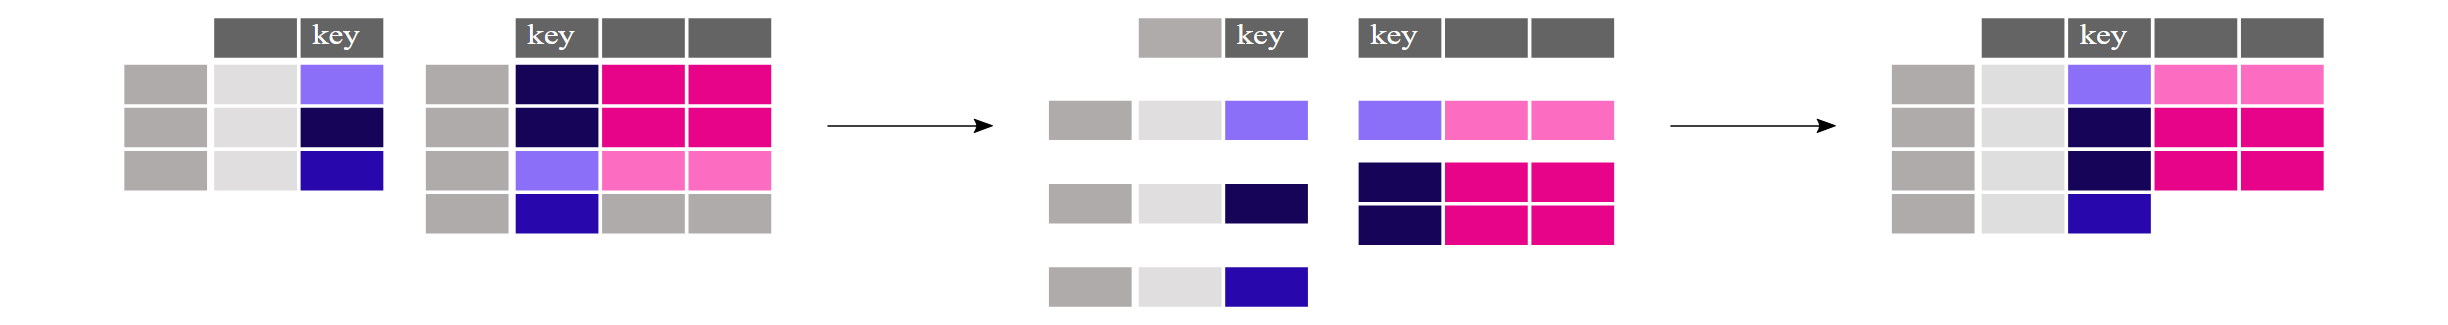

### Add the station coordinates, provided by the stations metadata table, to the corresponding rows in the measurements table.

## REMEMBER
* Multiple tables can be concatenated both column-wise and row-wise using the `concat` function.
* For database-like merging/joining of tables, use the `merge` function.